# <a id='toc1_'></a>[REGRESIÓN LOGÍSTICA](#toc0_)

Se aplica cuando tenemos que analizar un conjunto de datos cuya salida/objetivo es discreto (no contínuo), y permite modelar las probabilidades de problemas de clasificación con dos resultados posibles (binario). Es por ello que decimos que el resultado es **discreto o categórico** (SI/NO, 0/1, TRUE/FALSE)

En el siguiente problema se intenta predecir si una flor del dataset IRIS pertenece o no (clasificación binaria) a un determinado tipo.

**Tabla de contenidos**<a id='toc0_'></a>    
- [REGRESIÓN LOGÍSTICA](#toc1_)    
  - [Graficado de la frontera de decisión](#toc1_1_)    
    - [-Importamos las librerías a utilizar](#toc1_1_1_)    
    - [-Cargamos el dataset](#toc1_1_2_)    
    - [-Creamos y entrenamos el modelo](#toc1_1_3_)    
    - [-Realizamos predicciones y estimamos probabilidades](#toc1_1_4_)    
    - [-Graficamos los resultados, mostrando la frontera de decisión](#toc1_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Graficado de la frontera de decisión](#toc0_)

Partiendo del dataset iris del paquete scikit-learn, vamos a usar un modelo de regresión logística para predecir si una flor es de tipo "VIRGÍNICA" en función de la anchura del pétalo

### <a id='toc1_1_1_'></a>[-Importamos las librerías a utilizar](#toc0_)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### <a id='toc1_1_2_'></a>[-Cargamos el dataset](#toc0_)

In [4]:
iris = load_iris()
 
X = iris.data[:, 3:] # petal width
y = (iris.target == 2).astype(int)

In [5]:
# Visualización del conjunto de datos - Primeros 5 registros
print("Features: ", iris.feature_names)
print(iris.data[:5])
print("Target: ")
print(iris.target[:5])

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target: 
[0 0 0 0 0]


In [20]:
print("X (petal lenght(cm)) : Valores entre ", X.min()," y ", X.max())

X (petal lenght(cm)) : Valores entre  0.1  y  2.5


### <a id='toc1_1_3_'></a>[-Creamos y entrenamos el modelo](#toc0_)

In [6]:
log_reg = LogisticRegression()
 
log_reg.fit(X, y)

LogisticRegression()

### <a id='toc1_1_4_'></a>[-Realizamos predicciones y estimamos probabilidades](#toc0_)

In [7]:
# Crea un array NumPy con 1000 valores espaciados uniformemente entre 0 y 3 (longitud de los pétalos)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# Calcula la probabilidad de que cada flor del nuevo conjunto X_new sea Iris-Virginica
y_proba = log_reg.predict_proba(X_new)

In [9]:
# Características de la predicción
# X not virginica e Y no virginica
X_not_virg = X[0:100, :]  # Primeras 100 filas contiene las características de las flores que no son virginica
y_not_virg = y[0:100]
# X virginica e Y virginica
X_virg = X[100:, :] # Resto de las filas contiene las características de las flores que son virginica (50)
y_virg = y[100:]

### <a id='toc1_1_5_'></a>[-Graficamos los resultados, mostrando la frontera de decisión](#toc0_)

Text(0.5, 1.0, 'Probabilidades estimadas y fronteras de decisión')

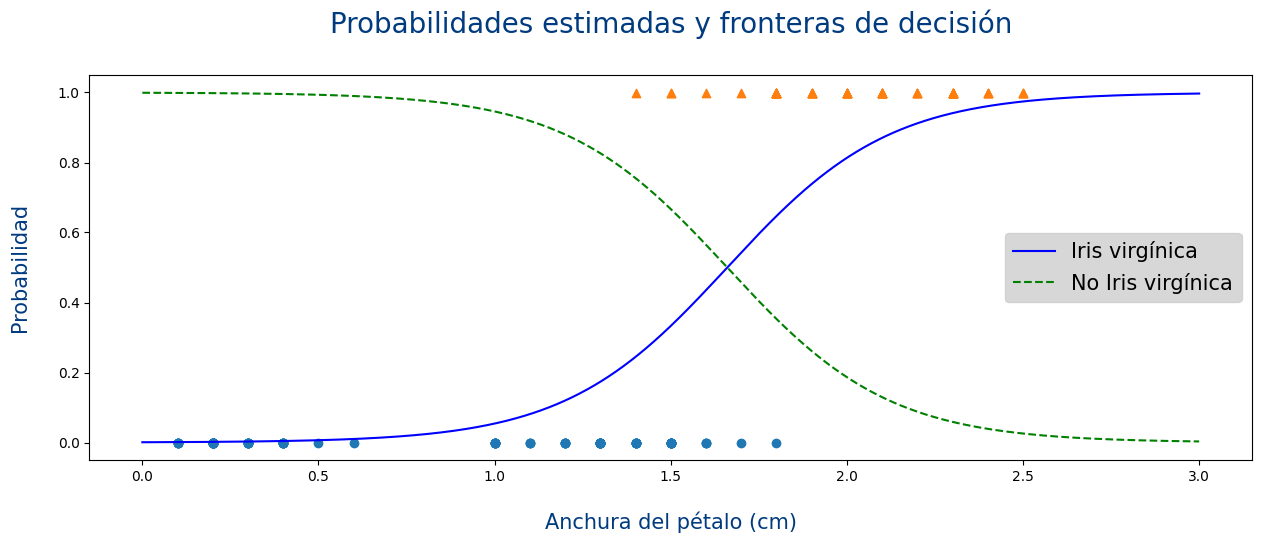

In [10]:
figure=plt.figure(figsize=(15, 5))
axes = figure.add_subplot()
axes.plot(X_new, y_proba[:, 1], "b-", label = "Iris virgínica")
axes.plot(X_new, y_proba[:, 0], "g--", label = "No Iris virgínica")
axes.scatter(X_not_virg, y_not_virg)
axes.scatter(X_virg, y_virg, marker = "^")
axes.legend(fontsize=15,facecolor='#CDCDCD',labelcolor="#000000")
axes.set_xlabel('Anchura del pétalo (cm)', fontsize=15,labelpad=20,color="#003B80") 
axes.set_ylabel('Probabilidad', fontsize=15,labelpad=20,color="#003B80") 
axes.set_title("Probabilidades estimadas y fronteras de decisión", fontsize=20,pad=30,color="#003B80") 

Como vemos, la anchura de las flores iris virgínica va desde 1.4 hasta 2.5 cm, mientras que las otras flores tienen, por lo general, una anchura de pétalo más pequeña. Hay un cierto solapamiento en los datos: por encima de 2cm, el modelo está bastante seguro que es virgínica, mientras que por debajo de 1 cm está bastante seguro que no lo es. En medio de estos extremos, el clasificador no está del todo seguro. Hay un límite de decisión alrededor de 1.6 cm donde ambas probabilidades son iguales al 50%.

## EVALUACIÓN DEL MODELO

### PRECISIÓN (ACCURACY)

Proporción de predicciones correctas realizadas con respecto al número total de predicciones:   

<center>Precisión = (Número de predicciones correctas) / (Número total de predicciones)</center>

In [22]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y, log_reg.predict(X))
print ("Precisión del modelo: ", acc*100, "%")


Precisión del modelo:  96.0 %


#### MATRIZ DE CONFUSIÓN  

In [24]:
from sklearn.metrics import confusion_matrix
print("Matriz de confusión: ")
print(confusion_matrix(y, log_reg.predict(X)))

Matriz de confusión: 
[[98  2]
 [ 4 46]]


La matriz de confusión nos muestra en su primera columna la predicción de la clase "No virgínica" y en la segunda la predicción de la  clase "Virgínica". En su primera fila están la información de las flores "No vírginica" reales y en la segunda fila las flores "Virgínica" reales.   
Por tanto, de 100 ejemplares reales "No virgínica" clasifica bien 98 y mal 2. De 50 ejemplares reales "virgínica" clasifica bien 46 y mal 4.

#### INFORME DE CLASIFICACIÓN

In [25]:
print("Informe de clasificación: ")
from sklearn.metrics import classification_report
print(classification_report(y, log_reg.predict(X)))

Informe de clasificación: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



#### Métricas por clase:

- Precisión (precision):
  - Clase 0: 0.96. De todas las instancias que el modelo predijo como clase 0, el 96% eran realmente de la clase 0.
  - Clase 1: 0.96. De todas las instancias que el modelo predijo como clase 1, el 96% eran realmente de la clase 1.
- Exhaustividad (recall):
  - Clase 0: 0.98. De todas las instancias que realmente eran de la clase 0, el modelo identificó correctamente el 98%.
  - Clase 1: 0.92. De todas las instancias que realmente eran de la clase 1, el modelo identificó correctamente el 92%.
- Puntuación F1 (f1-score):
  - Clase 0: 0.97. Es una medida que combina precisión y exhaustividad. Un valor alto indica un buen equilibrio entre ambas.
  - Clase 1: 0.94.
- Soporte (support):
  - Clase 0: 100. Indica el número de instancias de la clase 0 en el conjunto de datos.
  - Clase 1: 50. Indica el número de instancias de la clase 1 en el conjunto de datos.

#### Métricas globales:

- Exactitud (accuracy): 0.96. El modelo clasificó correctamente el 96% de todas las instancias en el conjunto de datos.
- Macro promedio (macro avg): Calcula el promedio de las métricas (precisión, exhaustividad, puntuación F1) para cada clase, sin tener en cuenta el número de instancias en cada clase.
- Promedio ponderado (weighted avg): Calcula el promedio de las métricas para cada clase, teniendo en cuenta el número de instancias en cada clase (es decir, ponderado por el soporte).

En general, este informe indica que el modelo tiene un buen rendimiento en ambas clases, con una precisión y exhaustividad altas. La puntuación F1 también es alta, lo que indica un buen equilibrio entre precisión y exhaustividad.